In [2]:
from pilot import *
%matplotlib inline
plt.style.use("ggplot")

# Pilot experiment

Run the following cell to begin.

Question: 17/100
Block: 1/5

Is this a bivimias or lorifens?


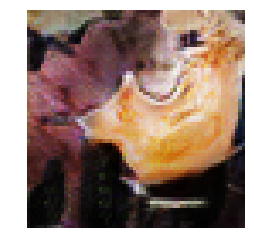

SEJveChjaGlsZHJlbj0oQnV0dG9uKGRlc2NyaXB0aW9uPXUnQml2aW1pYXMnLCBzdHlsZT1CdXR0b25TdHlsZSgpKSwgQnV0dG9uKGRlc2NyaXB0aW9uPXUnTG9yaWZlbnMnLCBzdHlsZT1CdXTigKY=


In [5]:
ndims=100#np.random.choice([50, 100, 200])
offset= 0.6
std = 0.25
config = get_config(offset=offset, std=std, ndims=ndims, print_feedback=False)
blocks = get_blocks(config)
pilot_experiment(blocks, config)

# Export experiment

In [34]:
import time
from glob import glob

# export experiment
logdir = "/Users/alexyku/Desktop/logs"

if experiment_is_complete(blocks):
    outdir = os.path.join(logdir, ("offset-" + str(offset)
                                   + "-std-" + str(std)
                                   + "-ndims-" + str(ndims)
                                   + "-timestamp-" + str(int(time.time()))))
    !mkdir -p {outdir}
    
    print("Logging experiment to %s" % outdir)

    np.savez(os.path.join(outdir, "config.npz"), **config)
    np.savez(os.path.join(outdir, "blocks.npz"), *blocks)
else:
    print("Experiment is incomplete, not logging.")

Logging experiment to /Users/alexyku/Desktop/logs/offset-0.6-std-0.25-ndims-50-timestamp-1525642619


# Analysis

In [30]:
def get_acc_per_block(outdir):
    # config = dict(np.load(os.path.join(outdir, "config.npz")).items())
    blocks = [
        list(x) for _, x in
        sorted(np.load(
            os.path.join(outdir, "blocks.npz")
        ).items())
    ]
    assert experiment_is_complete(blocks)
    acc_per_block = []
    for block in blocks:
        acc = np.mean([
            x["category"] == x["predicted_category"]
            for x in block
        ])
        acc_per_block.append(acc)
    return acc_per_block

from glob import glob
acc_per_block_200 = np.array([get_acc_per_block(x) for x in glob(os.path.join(logdir, "ndims-200-*"))])
acc_per_block_100 = np.array([get_acc_per_block(x) for x in glob(os.path.join(logdir, "ndims-100-*"))])
acc_per_block_50 = np.array([get_acc_per_block(x) for x in glob(os.path.join(logdir, "ndims-50-*"))])

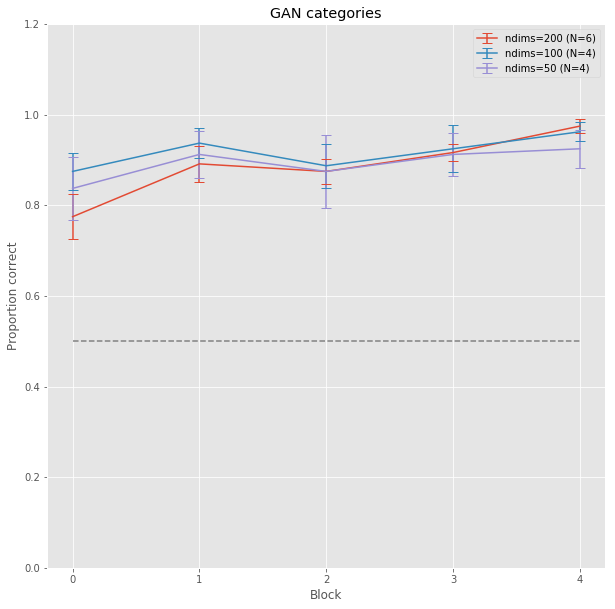

In [31]:
from scipy import stats
plt.figure(figsize=(10., 10.))

# TODO: plot mean and error bars instead.

mean_200 = np.mean(acc_per_block_200, axis=0)
std_200 = np.std(acc_per_block_200, axis=0)
sem_200 = stats.sem(acc_per_block_200, axis=0, ddof=0)
N_200 = acc_per_block_200.shape[0]
plt.errorbar(
    range(len(mean_200)),
    mean_200,
    sem_200,
    capsize=5,
    label="ndims=200 (N=%d)" % N_200
)

mean_100 = np.mean(acc_per_block_100, axis=0)
std_100 = np.std(acc_per_block_100, axis=0)
sem_100 = stats.sem(acc_per_block_100, axis=0, ddof=0)
N_100 = acc_per_block_100.shape[0]
plt.errorbar(
    range(len(mean_100)),
    mean_100,
    sem_100,
    capsize=5,
    label="ndims=100 (N=%d)" % N_100
)

mean_50 = np.mean(acc_per_block_50, axis=0)
std_50 = np.std(acc_per_block_50, axis=0)
sem_50 = stats.sem(acc_per_block_50, axis=0, ddof=0)
N_50 = acc_per_block_50.shape[0]
plt.errorbar(
    range(len(mean_50)),
    mean_50,
    sem_50,
    capsize=5,
    label="ndims=50 (N=%d)" % N_50
)
    
plt.plot([0, 4], [0.5, 0.5], color='gray', linestyle="--")
    
plt.xticks(range(0, 5))
plt.xlabel("Block")

plt.ylim(0., 1.2)
plt.ylabel("Proportion correct")

plt.title("GAN categories")
    
plt.legend()
plt.show()

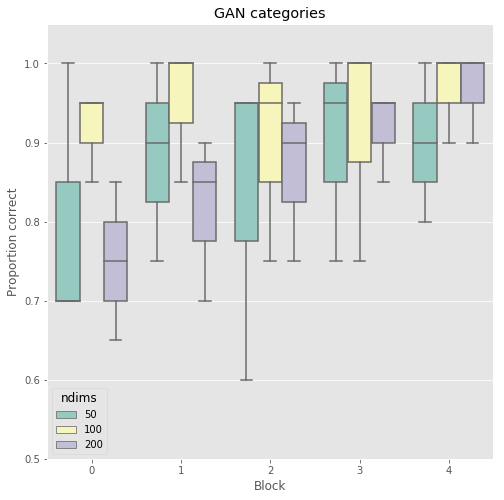

In [116]:
import seaborn as sns
import pandas as pd

# good coding alex!
df = pd.DataFrame(sum([sum([[{
    "block": i,
    "accuracy": acc,
    "ndims": ndims
} for i, acc in enumerate(accs)]
    for accs in acc_per_block], [])
 for ndims, acc_per_block in {
     200: acc_per_block_200,
     100: acc_per_block_100,
     50: acc_per_block_50
 }.items()], []))

plt.figure(figsize=(8., 8.))
ax = sns.boxplot(
    x="block",
    y="accuracy",
    hue="ndims",
    data=df,
    palette="Set3"
)
    
plt.xticks(range(0, 5))
plt.xlabel("Block")

plt.ylim(0.5, 1.05)
plt.ylabel("Proportion correct")

plt.title("GAN categories")
plt.show()